<a href="https://colab.research.google.com/github/zah80/fullpack-ia-module-1/blob/main/Test_Technique_Analyse_des_Donn%C3%A9es_et_S%C3%A9ries_Temporelles_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 : Analyse du Churn des Utilisateurs de Waze**







Tâche 1 : Exploration des Données (EDA)

1. Charger le dataset et afficher les premières lignes.

In [1]:
pip install pandas


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/waze_dataset.csv", sep=";", encoding="latin-1")



1. Charger le dataset et afficher les premières lignes.

 Charger le dataset

In [6]:
data

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0.0,retained,283.0,226.0,296.748273,2276.0,208.0,0.0,2628.845068,1985.775061,28.0,19.0,Android
1,1.0,retained,133.0,107.0,326.896596,1225.0,19.0,64.0,13715.920550,3160.472914,13.0,11.0,iPhone
2,2.0,retained,114.0,95.0,135.522926,2651.0,0.0,0.0,3059.148818,1610.735904,14.0,8.0,Android
3,3.0,retained,49.0,40.0,67.589221,15.0,322.0,7.0,913.591123,587.196542,7.0,3.0,iPhone
4,4.0,retained,84.0,68.0,168.247020,1562.0,166.0,5.0,3950.202008,1219.555924,27.0,18.0,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994.0,retained,60.0,55.0,207.875622,140.0,317.0,0.0,2890.496901,2186.155708,25.0,17.0,iPhone
14995,14995.0,retained,42.0,35.0,187.670313,2505.0,15.0,10.0,4062.575194,1208.583193,25.0,20.0,Android
14996,14996.0,retained,273.0,219.0,422.017241,1873.0,17.0,0.0,3097.825028,1031.278706,18.0,17.0,iPhone
14997,14997.0,churned,149.0,120.0,180.524184,3150.0,45.0,0.0,4051.758549,254.187763,6.0,6.0,iPhone


Afficher les 5 premières lignes.

In [7]:
data.sample(5)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
483,483.0,retained,9.0,7.0,38.590315,2306.0,23.0,12.0,7100.775516,4602.424742,19.0,19.0,iPhone
11896,11896.0,churned,9.0,8.0,13.379040,49.0,0.0,13.0,4113.255159,2564.659034,8.0,8.0,Android
8008,8008.0,retained,214.0,173.0,224.865742,2934.0,98.0,199.0,4018.827114,856.090789,22.0,14.0,iPhone
12499,12499.0,retained,2.0,2.0,5.679118,288.0,42.0,49.0,1965.481496,1238.660020,21.0,15.0,iPhone
13680,13680.0,NaN,21.0,21.0,160.288871,2294.0,0.0,90.0,3505.159578,269.150599,17.0,10.0,iPhone


2. Identifier le nombre total de valeurs manquantes par colonne.

In [8]:
data.shape

(14999, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14997 non-null  float64
 1   label                    14296 non-null  object 
 2   sessions                 14997 non-null  float64
 3   drives                   14997 non-null  float64
 4   total_sessions           14997 non-null  float64
 5   n_days_after_onboarding  14996 non-null  float64
 6   total_navigations_fav1   14997 non-null  float64
 7   total_navigations_fav2   14997 non-null  float64
 8   driven_km_drives         14996 non-null  float64
 9   duration_minutes_drives  14995 non-null  float64
 10  activity_days            14996 non-null  float64
 11  driving_days             14997 non-null  float64
 12  device                   14997 non-null  object 
dtypes: float64(11), object(2)
memory usage: 1.5+ MB


In [10]:
data.isnull().values.any()

True

In [11]:
data.isnull().sum()

,0
ID,2
label,703
sessions,2
drives,2
total_sessions,2
n_days_after_onboarding,3
total_navigations_fav1,2
total_navigations_fav2,2
driven_km_drives,3
duration_minutes_drives,4


In [12]:
data.isnull().sum().sum()

732

3. Remplacer les valeurs manquantes par une méthode appropriée (moyenne, médiane,
ou autre) et justifier le choix.

La meilleure méthode pour remplacer les valeurs manquantes dépend du type de données:

=> Pour les variables numériques avec peu de variance, la moyenne est idéale car elle conserve la tendance centrale des données sans introduire de biais important.

=>Pour les variables catégoriques, il est préférable d'utiliser le mode (valeur la plus fréquente), car cela permet de remplacer les valeurs manquantes par l'option la plus représentative sans fausser la distribution des catégories.

In [12]:
# Remplacement des valeurs manquantes pour les colonnes numériques avec la moyenne
for column in ['ID', 'sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
               'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
               'duration_minutes_drives', 'activity_days', 'driving_days']:
    data[column] = data[column].fillna(data[column].mean())

# Remplacement des valeurs manquantes pour les colonnes catégorielles avec le mode
for column in ['label', 'device']:
    mode_value = data[column].mode()[0]  # Récupérer la valeur la plus fréquente
    data[column] = data[column].fillna(mode_value)

# Affichage du nombre de valeurs manquantes après l'imputation
print("Valeurs manquantes par colonne :\n", data.isnull().sum())

Valeurs manquantes par colonne :
 ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64


4. Afficher les statistiques descriptives des variables numériques.

In [13]:
data.describe()


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14997.000000,14997.000000,14997.000000,14997.000000,14996.000000,14997.000000,14997.000000,14996.000000,14995.000000,14996.000000,14997.000000
mean,7499.965260,80.575048,67.229646,189.777020,1752.105828,121.436621,29.625725,4036.643232,1860.174857,15.530275,12.177369
std,4329.465339,80.653737,65.880067,136.216966,1008.483766,148.017462,45.395732,2500.460464,1444.349409,8.998437,7.815722
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3751.000000,23.000000,20.000000,90.747466,881.000000,9.000000,0.000000,2216.394709,837.044279,8.000000,5.000000
50%,7500.000000,56.000000,48.000000,159.260718,1745.000000,70.000000,9.000000,3488.862310,1479.747166,16.000000,12.000000
75%,11249.000000,111.000000,93.000000,253.868078,2629.000000,177.000000,43.000000,5285.762766,2462.694994,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


5. Générer des histogrammes pour visualiser la distribution de total_km, driving_days et
total_drives.

In [14]:
import matplotlib.pyplot as plt

# Définir la taille de la figure
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

visualisation de la distribution de total_km

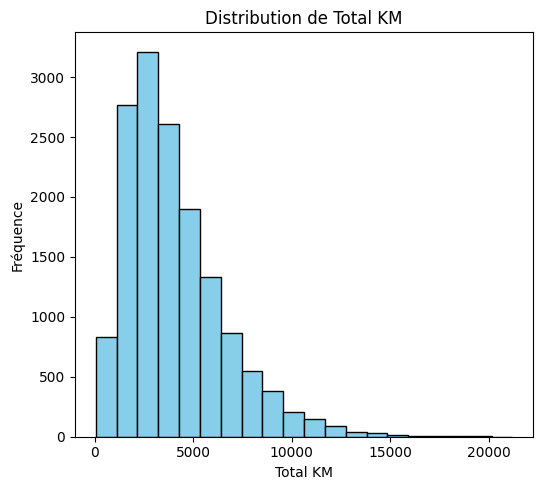

In [15]:
import matplotlib.pyplot as plt

# Définir la taille de la figure
plt.figure(figsize=(15, 5))

# Histogramme pour 'driven_km_drives' (équivalent de 'total_km')
plt.subplot(1, 3, 1)  # 1 ligne, 3 colonnes, premier graphique
plt.hist(data['driven_km_drives'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution de Total KM')
plt.xlabel('Total KM')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

Visualisation de driving_days

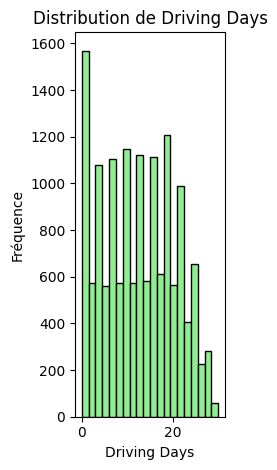

In [16]:
# Histogramme pour 'driving_days'
plt.subplot(1, 3, 2)  # 1 ligne, 3 colonnes, deuxième graphique
plt.hist(data['driving_days'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution de Driving Days')
plt.xlabel('Driving Days')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

Visualisation de total_drives



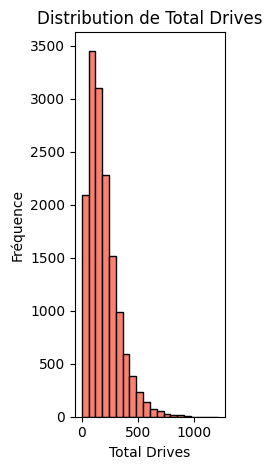

In [17]:
# Histogramme pour 'total_drives'
plt.subplot(1, 3, 3)  # 1 ligne, 3 colonnes, troisième graphique
plt.hist(data['total_sessions'], bins=20, color='salmon', edgecolor='black')  # Si 'total_drives' n'est pas disponible, utilise une autre colonne pertinente
plt.title('Distribution de Total Drives')
plt.xlabel('Total Drives')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

6. Calculer une matrice de corrélation et identifier la paire de variables la plus corrélée.

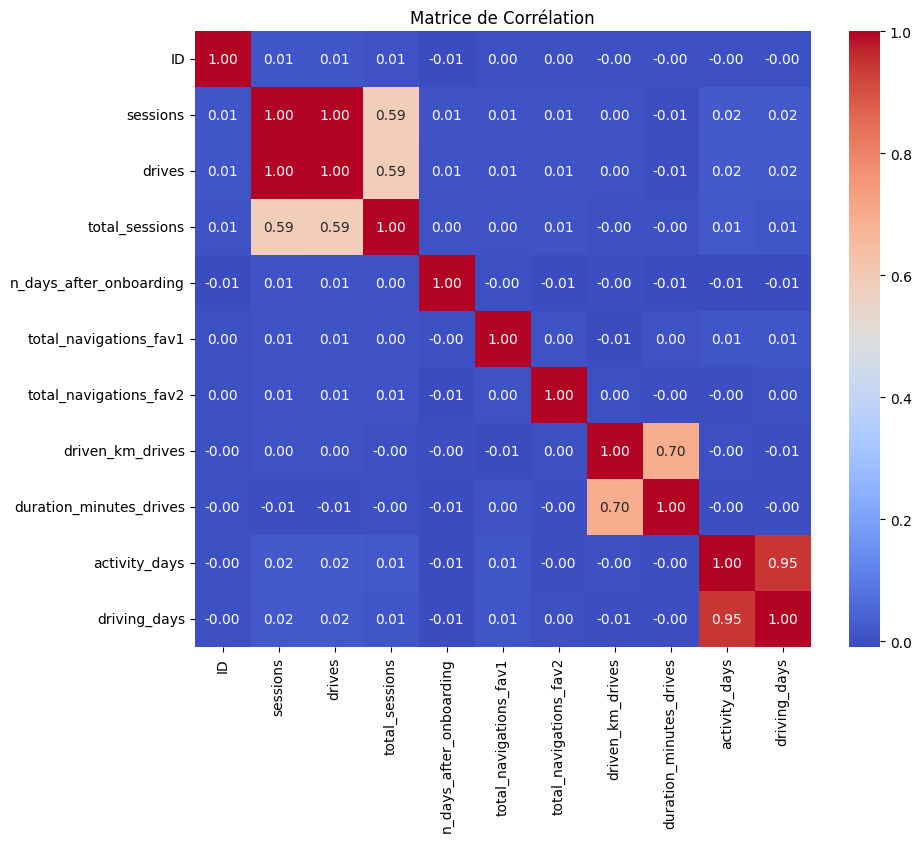

La paire de variables la plus corrélée est : ('drives', 'sessions') avec une corrélation de 1.00


In [18]:
# Calculer la matrice de corrélation
correlation_matrix = data.corr(numeric_only=True)  # Ajout de numeric_only pour éviter les erreurs

# Afficher la heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de Corrélation")
plt.show()

# Identifier la paire de variables la plus corrélée
corr_pairs = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))
max_corr_pair = corr_pairs.stack().idxmax()
max_corr_value = corr_pairs.stack().max()

# Afficher le résultat
print(f"La paire de variables la plus corrélée est : {max_corr_pair} avec une corrélation de {max_corr_value:.2f}")


La matrice de corrélation montre que "drives" et "sessions" sont parfaitement corrélées (1.00), indiquant que plus un utilisateur fait de sessions, plus il effectue de trajets, ce qui est logique car chaque trajet nécessite une session. 🚀

**Tâche 2 : Feature Engineering –**

créatioon d une nouvelle variable qui apporte une meilleure compréhension du comportement des utilisateurs en analysant leur distance parcourue par jour de conduite.

1. Création de la variable km_per_driving_day

In [19]:
# Calculer la variable 'km_per_driving_day'
data['km_per_driving_day'] = data['driven_km_drives'] / data['driving_days']

In [20]:
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day
0,0.0,retained,283.0,226.0,296.748273,2276.0,208.0,0.0,2628.845068,1985.775061,28.0,19.0,Android,138.360267
1,1.0,retained,133.0,107.0,326.896596,1225.0,19.0,64.0,13715.920550,3160.472914,13.0,11.0,iPhone,1246.901868
2,2.0,retained,114.0,95.0,135.522926,2651.0,0.0,0.0,3059.148818,1610.735904,14.0,8.0,Android,382.393602
3,3.0,retained,49.0,40.0,67.589221,15.0,322.0,7.0,913.591123,587.196542,7.0,3.0,iPhone,304.530374
4,4.0,retained,84.0,68.0,168.247020,1562.0,166.0,5.0,3950.202008,1219.555924,27.0,18.0,Android,219.455667


In [22]:
data['km_per_driving_day']=data['km_per_driving_day'].replace([np.inf, -np.inf], 0)

In [21]:
# Remplacer les valeurs infinies (résultant d'une division par zéro) par 0
data['km_per_driving_day'].replace([float('inf'), float('-inf')], 0, inplace=True)

<ipython-input-21-e65e4374c0c1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['km_per_driving_day'].replace([float('inf'), float('-inf')], 0, inplace=True)


In [23]:
# Vérifier les statistiques descriptives de la nouvelle variable
data.describe()


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14997.000000,14997.000000,14997.000000,14997.000000,14996.000000,14997.000000,14997.000000,14996.000000,14995.000000,14996.000000,14997.000000,14996.000000
mean,7499.965260,80.575048,67.229646,189.777020,1752.105828,121.436621,29.625725,4036.643232,1860.174857,15.530275,12.177369,578.332068
std,4329.465339,80.653737,65.880067,136.216966,1008.483766,148.017462,45.395732,2500.460464,1444.349409,8.998437,7.815722,1029.621081
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,3751.000000,23.000000,20.000000,90.747466,881.000000,9.000000,0.000000,2216.394709,837.044279,8.000000,5.000000,136.606767
50%,7500.000000,56.000000,48.000000,159.260718,1745.000000,70.000000,9.000000,3488.862310,1479.747166,16.000000,12.000000,272.581449
75%,11249.000000,111.000000,93.000000,253.868078,2629.000000,177.000000,43.000000,5285.762766,2462.694994,23.000000,19.000000,557.672984
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110


Interprétation synthétique de km_per_driving_day
Moyenne : 578 km/jour, avec une grande dispersion (écart-type : 1029 km).
Quartiles : 50% des utilisateurs parcourent moins de 273 km/jour, mais certains dépassent 1000 km/jour.
Valeurs extrêmes : Distance maximale 15 420 km/jour, suggérant des outliers ou erreurs.
🚨 Points d’attention
Forte hétérogénéité, certains utilisateurs étant bien plus actifs (chauffeurs pro ?).
Valeurs nulles (0 km) : jours sans conduite ou erreurs de données.
Vérification nécessaire des outliers (>1000 km/jour) pour éviter les biais.
🎯 Conclusion
L’usage est très variable, nécessitant une segmentation (chauffeurs vs utilisateurs classiques) et un filtrage des valeurs aberrantes.

2. Création de la variable professional_driver


 Définir un nouveau collone telque un conducteur professionnel comme un utilisateur ayant : nombre de trajet >= 60 et le nombre total des jours >= 15

• Créer une variable binaire professional_driver (1 pour les pros, 0 sinon).

In [24]:
# Créer la variable 'professional_driver' : 1 pour les professionnels, 0 sinon
data['professional_driver'] = ((data['drives'] >= 60) & (data['driving_days'] >= 15)).astype(int)


Verification de l'ajout d'une nouvelle variable 'professional_driver'

In [25]:
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver
0,0.0,retained,283.0,226.0,296.748273,2276.0,208.0,0.0,2628.845068,1985.775061,28.0,19.0,Android,138.360267,1
1,1.0,retained,133.0,107.0,326.896596,1225.0,19.0,64.0,13715.920550,3160.472914,13.0,11.0,iPhone,1246.901868,0
2,2.0,retained,114.0,95.0,135.522926,2651.0,0.0,0.0,3059.148818,1610.735904,14.0,8.0,Android,382.393602,0
3,3.0,retained,49.0,40.0,67.589221,15.0,322.0,7.0,913.591123,587.196542,7.0,3.0,iPhone,304.530374,0
4,4.0,retained,84.0,68.0,168.247020,1562.0,166.0,5.0,3950.202008,1219.555924,27.0,18.0,Android,219.455667,1


• Vérifier la répartition (value_counts()).
pour montrer les nombres de 0 et les nombres de 1

In [26]:
repartition = data['professional_driver'].value_counts()
print("Répartition de 'professional_driver' :")
print(repartition)


Répartition de 'professional_driver' :
professional_driver
0    12415
1     2584
Name: count, dtype: int64


Calculer le churn rate pour les professionnels et non-professionnels.

pour comparer la fidélité des utilisateurs professionnels et non-professionnels. Un churn faible chez les professionnels indique qu'ils sont plus fidèles, tandis qu'un churn élevé chez les non-professionnels suggère un usage temporaire

In [27]:
# Vérifier les valeurs uniques de la variable "label" (s'assurer qu'on a bien 'churned' et 'retained')
print(data['label'].unique())

# Convertir la variable 'label' en binaire : 1 si churned, 0 sinon
data['churned'] = (data['label'] == 'churned').astype(int)

# Calculer le churn rate pour les professionnels et non-professionnels
churn_rate = data.groupby('professional_driver')['churned'].mean() * 100

# Afficher les résultats
print(f"Taux de churn des conducteurs non-professionnels : {churn_rate[0]:.2f}%")
print(f"Taux de churn des conducteurs professionnels : {churn_rate[1]:.2f}%")

['retained' 'churned' nan]
Taux de churn des conducteurs non-professionnels : 18.88%
Taux de churn des conducteurs professionnels : 7.24%


Tâche 3 : Encodage et Vérification de la Multicolinéarité

1. Encodage de la variable churned

C est une partie de  machine learning pour Faciliter l'analyse statistique et  de calculer des statistiques

In [28]:
# Créer une nouvelle colonne 'label2' qui encode la variable 'label' en 0 (retenu) et 1 (churned)
data['label2'] = data['label'].apply(lambda x: 1 if x == 'churned' else 0)


value_counts = data['label2'].value_counts()
percentages = (value_counts / len(data)) * 100  # Calcul du pourcentage


print(f"0    {value_counts[0]}  ({percentages[0]:.2f}%)  → Utilisateurs retenus")
print(f"1    {value_counts[1]}  ({percentages[1]:.2f}%)  → Utilisateurs churned")

0    12468  (83.13%)  → Utilisateurs retenus
1    2531  (16.87%)  → Utilisateurs churned


===>La majorité des utilisateurs (83%) restent actifs sur Waze, tandis que 17% quittent la plateforme.


2. Encodage de la variable device


In [29]:
# Créer une nouvelle colonne 'device2' qui encode la variable 'device' en 0 (Android) et 1 (iPhone)
data['device2'] = data['device'].apply(lambda x: 1 if x == 'iPhone' else 0)

# Vérifier la répartition des valeurs
print(data['device2'].value_counts())


device2
1    9683
0    5316
Name: count, dtype: int64


3. Vérification de la Multicolinéarité

Générer la matrice de corrélation entre les variables numériques

<Axes: >

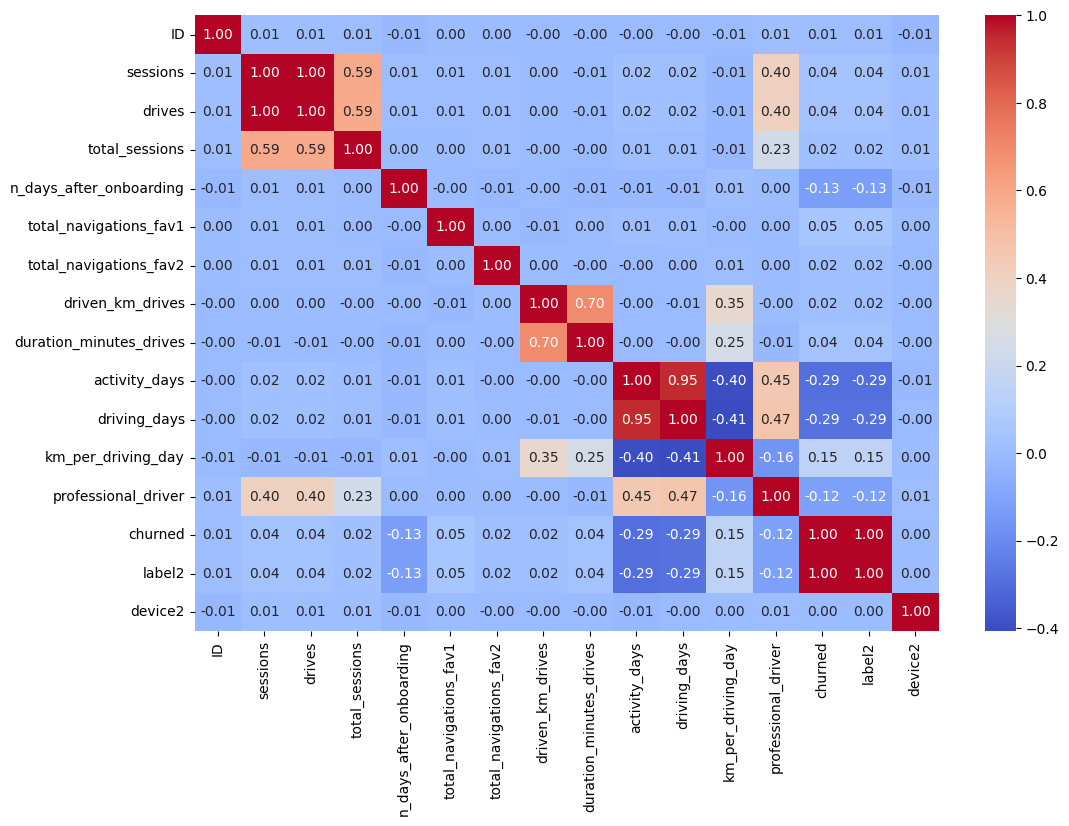

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix, EXCLUDING 'label' column
# by selecting only numeric features:
corr_matrix = data.select_dtypes(include=['number']).corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix, EXCLUDING 'label' column
# by selecting only numeric features:
corr_matrix = data.select_dtypes(include=['number']).corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

 Identifier les paires ayant une corrélation > 0.7

In [31]:
# Trouver les paires de variables avec une corrélation > 0.7
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Afficher les paires ayant une corrélation > 0.7
for pair in high_corr_pairs:
    print(f"Les variables {pair[0]} et {pair[1]} ont une corrélation de {pair[2]:.2f}")


Les variables drives et sessions ont une corrélation de 1.00
Les variables driving_days et activity_days ont une corrélation de 0.95
Les variables label2 et churned ont une corrélation de 1.00


Puisque ces variables sont fortement corrélées, nous devons en supprimer une dans chaque paire pour éviter la redondance et améliorer la clarté du dataset




**Task 2 : Analyse des Séries Temporelles**


1. Préparation et Exploration des Données

1. Charger le dataset et afficher les premières lignes

In [32]:
import pandas as pd

# Charger les données
data2 = pd.read_csv('/content/drive/MyDrive/daily-minimum-temperatures-in-me.csv')

# Afficher les premières lignes pour vérifier le contenu
data2.head()


,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


2. Vérifier le type des données et convertir Date en format datetime

In [34]:
# Vérifier les types de données
data2.dtypes

,0
Date,object
Daily minimum temperatures,object


In [35]:
# Convertir la colonne 'Date' en datetime
data2['Date'] = pd.to_datetime(data2['Date'])


In [36]:
# Vérifier que la conversion est réussie
data2.dtypes

,0
Date,datetime64[ns]
Daily minimum temperatures,object


In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 57.2+ KB


3. *Vérifier* la présence de valeurs manquantes et les traiter

In [38]:
# Vérifier les valeurs manquantes
data2.isnull().sum()


,0
Date,0
Daily minimum temperatures,0


4. Afficher des statistiques descriptives sur la température (min, max, moyenne,
médiane).

In [39]:
# Conversion en numérique pour éviter les erreurs
data2['Daily minimum temperatures'] = pd.to_numeric(data2['Daily minimum temperatures'], errors='coerce')

# Calcul et affichage de la température minimale
min_temp = data2['Daily minimum temperatures'].min()
print(f"Température minimale : {min_temp} °C")

Température minimale : 0.0 °C


In [40]:
# Calcul et affichage de la température maximale
max_temp = data2['Daily minimum temperatures'].max()
print(f"Température maximale : {max_temp} °C")

Température maximale : 26.3 °C


In [41]:
# Calcul et affichage de la température moyenne
mean_temp = data2['Daily minimum temperatures'].mean()
print(f"Température moyenne  : {mean_temp:.2f} °C")

Température moyenne  : 11.19 °C


In [42]:
# Calcul et affichage de la température médiane
median_temp = data2['Daily minimum temperatures'].median()
print(f"Température médiane  : {median_temp} °C")

Température médiane  : 11.0 °C


verification encore une fois les valeurs manquants (astuses de riheb)

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3647 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [44]:
# Vérifier encore une fois les valeurs manquantes
data2.isnull().sum()

,0
Date,0
Daily minimum temperatures,3




5. Tracer l’évolution de la température sur toute la période couverte par les données.

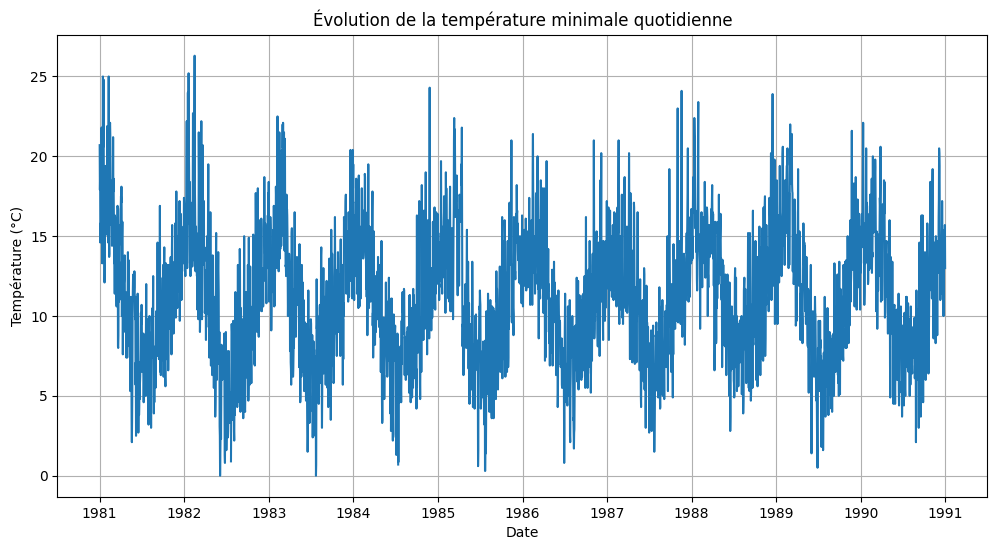

In [45]:
import matplotlib.pyplot as plt

# Tracer l’évolution de la température
plt.figure(figsize=(12, 6))
plt.plot(data2['Date'], data2['Daily minimum temperatures'])
plt.title('Évolution de la température minimale quotidienne')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.grid(True)
plt.show()


ici on vas utiliser la methode de L'Analyse en Composantes Principales (PCA) permet de réduire la dimensionnalité des données tout en capturant l'information essentielle. Ici, nous allons utiliser PCA pour analyser l’évolution de la température et identifier les tendances principales.

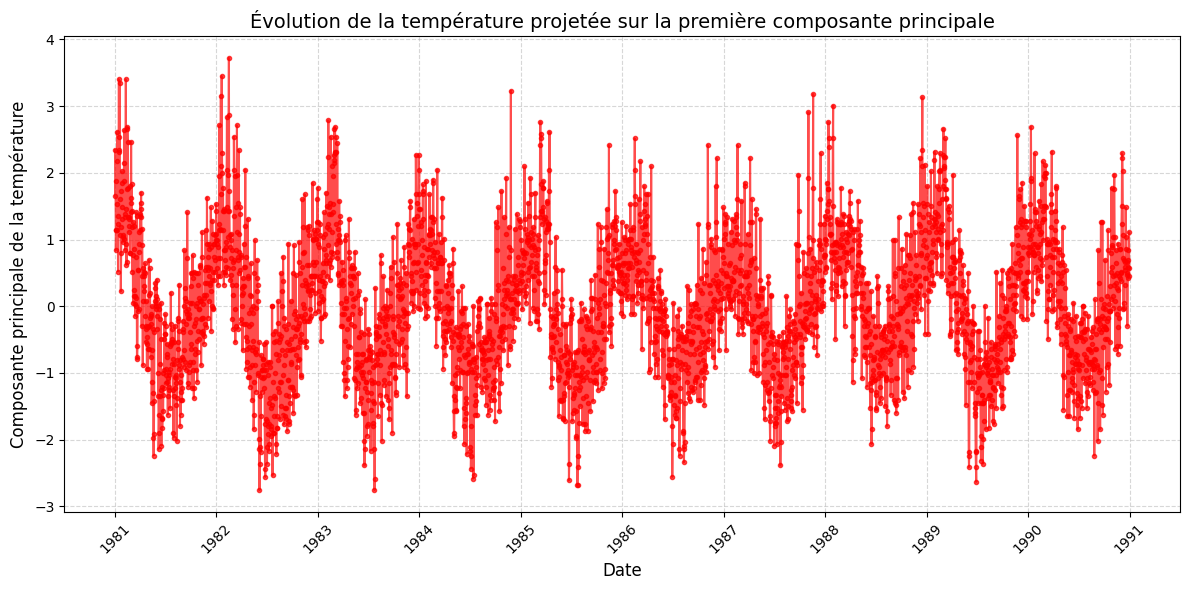

Variance expliquée par la première composante : 1.00


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Charger les données (assurez-vous que 'Date' et 'Température' existent)
data2['Date'] = pd.to_datetime(data2['Date'])
data2 = data2.sort_values(by='Date')

# Sélectionner uniquement les variables numériques pour le PCA
temperature_data = data2[['Daily minimum temperatures']].copy()

# Remplacer les NaN par la moyenne de la colonne (ou une autre stratégie)
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
temperature_data['Daily minimum temperatures'] = imputer.fit_transform(temperature_data[['Daily minimum temperatures']]) # Fit and transform

# Normalisation des données (important pour PCA)
scaler = StandardScaler()
temperature_scaled = scaler.fit_transform(temperature_data)

# Appliquer PCA (1 composante car nous avons une seule variable)
pca = PCA(n_components=1)
temperature_pca = pca.fit_transform(temperature_scaled)

# Ajouter la composante principale dans le dataset
data2['Temp_PCA'] = temperature_pca

# Tracer l'évolution de la température via PCA
plt.figure(figsize=(12, 6))
plt.plot(data2['Date'], data2['Temp_PCA'], linestyle='-', marker='o', markersize=3, color='r', alpha=0.7)

# Ajouter un titre et des labels
plt.title('Évolution de la température projetée sur la première composante principale', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Composante principale de la température', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Améliorer l'affichage des dates
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Afficher la variance expliquée par la première composante
print(f"Variance expliquée par la première composante : {pca.explained_variance_ratio_[0]:.2f}")

EXPLICATION :Le PCA est appliqué sur la température pour réduire la dimensionnalité et identifier les tendances principales. Après normalisation des données, une composante principale unique (Temp_PCA) est extraite et affichée sous forme de graphique temporel, permettant d’évaluer les variations climatiques.

2. Analyse des Tendances et Décomposition de la Série

6. Décomposer la série temporelle en tendance, saisonnalité et résidu.

<ipython-input-48-9ba6a7e0151e>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['Daily minimum temperatures'].fillna(method='ffill', inplace=True)
<ipython-input-48-9ba6a7e0151e>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data2['Daily minimum temperatures'].fillna(method='ffill', inplace=True)


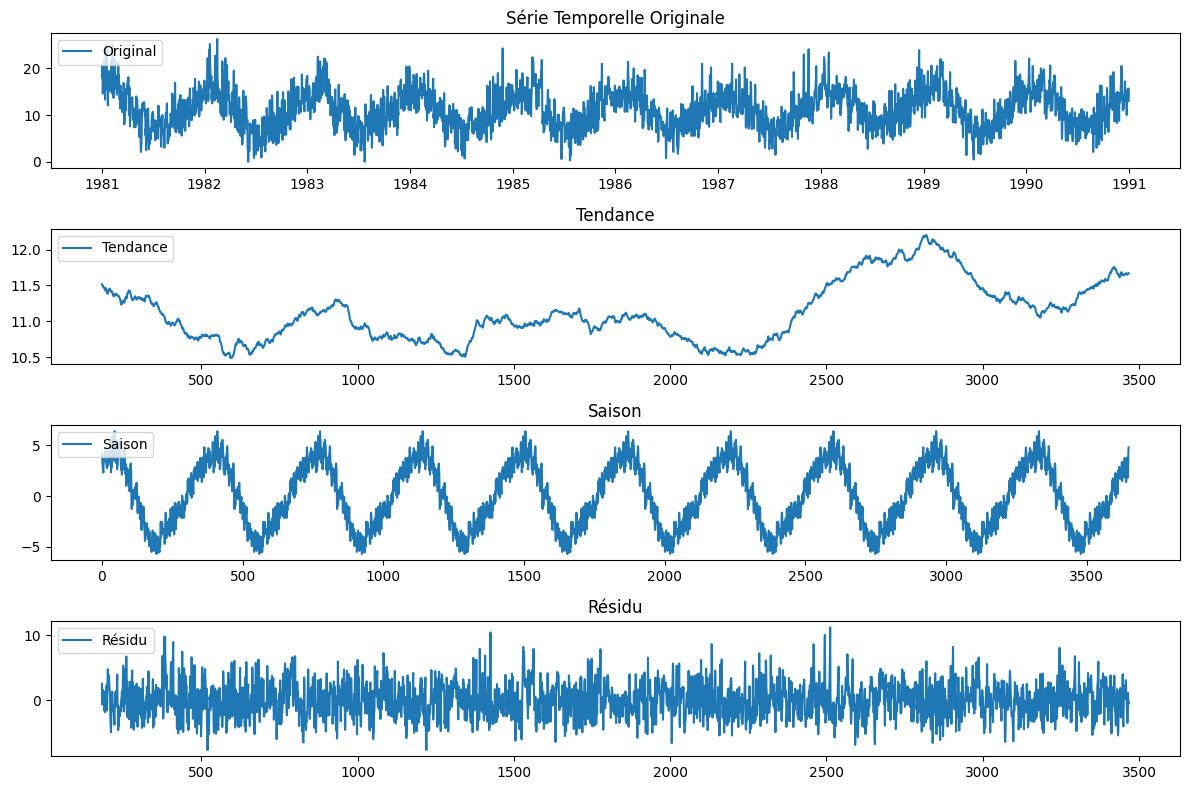

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assurez-vous que les données sont triées par date (si ce n'est pas déjà fait)
data2.sort_values('Date', inplace=True)

# Convertir 'Daily minimum temperatures' en numérique, en gérant les erreurs
data2['Daily minimum temperatures'] = pd.to_numeric(data2['Daily minimum temperatures'], errors='coerce')

# Gérer les valeurs manquantes avant d'appliquer seasonal_decompose
# Options possibles :
# 1. Supprimer les lignes avec des valeurs manquantes : data2.dropna(subset=['Daily minimum temperatures'], inplace=True)
# 2. Remplir avec une valeur spécifique (ex: 0) : data2['Daily minimum temperatures'].fillna(0, inplace=True)
# 3. Remplir avec la moyenne ou la médiane : data2['Daily minimum temperatures'].fillna(data2['Daily minimum temperatures'].mean(), inplace=True)
# Choisissez la méthode la plus appropriée pour vos données.
# Ici, on utilise le remplissage avec la dernière valeur connue (forward fill)
data2['Daily minimum temperatures'].fillna(method='ffill', inplace=True)


# Appliquer seasonal_decompose pour décomposer la série temporelle
decomposition = seasonal_decompose(data2['Daily minimum temperatures'], model='additive', period=365)

# Visualiser les composantes
plt.figure(figsize=(12, 8))

# Graphique de la série originale
plt.subplot(411)
plt.plot(data2['Date'], data2['Daily minimum temperatures'], label='Original') # Changed to Daily minimum temperatures
plt.legend(loc='upper left')
plt.title('Série Temporelle Originale')

# Graphique de la tendance
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendance')
plt.legend(loc='upper left')
plt.title('Tendance')

# Graphique de la saisonnalité
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Saison')
plt.legend(loc='upper left')
plt.title('Saison')

# Graphique des résidus
plt.subplot(414)
plt.plot(decomposition.resid, label='Résidu')
plt.legend(loc='upper left')
plt.title('Résidu')

plt.tight_layout()
plt.show()

Le code utilise seasonal_decompose pour analyser la température en trois composantes : la tendance (évolution à long terme), la saisonnalité (cycles saisonniers) et le résidu (variations aléatoires). Cela permet d’identifier les tendances climatiques et les fluctuations saisonnières

7. Appliquer une moyenne mobile (7 jours et 30 jours) et comparer avec la série originale

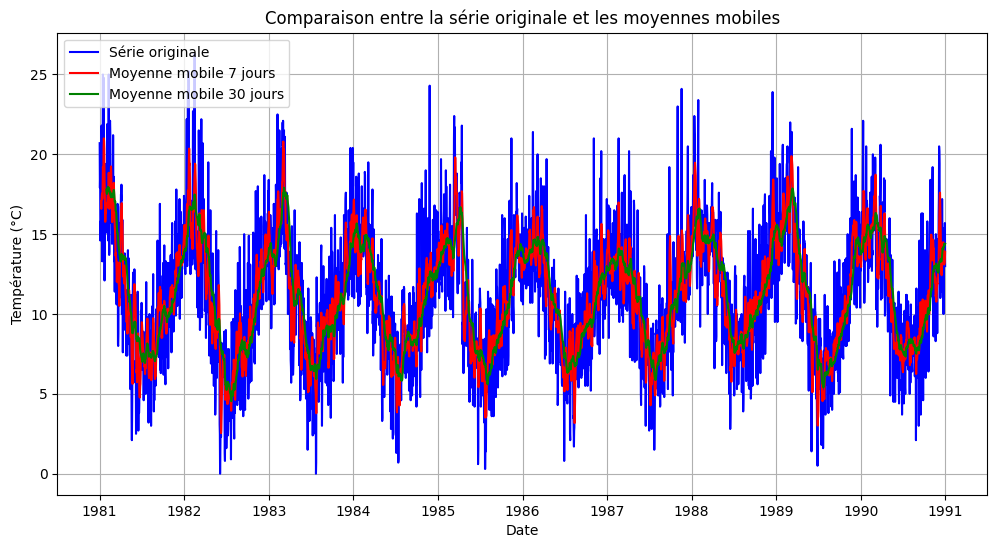

In [49]:
# Moyenne mobile sur 7 jours
data2['rolling_mean_7'] = data2['Daily minimum temperatures'].rolling(window=7).mean()

# Moyenne mobile sur 30 joursDaily minimum temperatures
data2['rolling_mean_30'] = data2['Daily minimum temperatures'].rolling(window=30).mean()

# Visualiser les séries
plt.figure(figsize=(12, 6))
plt.plot(data2['Date'], data2['Daily minimum temperatures'], label='Série originale', color='blue')
plt.plot(data2['Date'], data2['rolling_mean_7'], label='Moyenne mobile 7 jours', color='red')
plt.plot(data2['Date'], data2['rolling_mean_30'], label='Moyenne mobile 30 jours', color='green')
plt.title('Comparaison entre la série originale et les moyennes mobiles')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Ce code applique des moyennes mobiles (7 et 30 jours) pour lisser les variations de température et identifier les tendances à court et long terme. Le graphique compare la série originale (fluctuations quotidiennes) avec les moyennes mobiles, révélant les tendances climatiques de façon plus claire

8. Identifier les mois les plus froids et les plus chauds sur l’ensemble des années disponibles

In [50]:
# Extraire le mois et l'année
data2['Month'] = data2['Date'].dt.month
data2['Year'] = data2['Date'].dt.year

# Calculer la température moyenne par mois
monthly_avg_temp = data2.groupby('Month')['Daily minimum temperatures'].mean()

# Identifier les mois les plus froids et les plus chauds
coldest_month = monthly_avg_temp.idxmin()
warmest_month = monthly_avg_temp.idxmax()

print(f"Le mois le plus froid est le mois {coldest_month}.")
print(f"Le mois le plus chaud est le mois {warmest_month}.")


Le mois le plus froid est le mois 7.
Le mois le plus chaud est le mois 2.


Ce code extrait le mois et l’année, calcule la température moyenne mensuelle et identifie les mois les plus froids (idxmin()) et les plus chauds (idxmax()). Les résultats suggèrent un climat de l’hémisphère sud (juillet froid, février chaud), nécessitant une vérification de la localisation.

9. Calculer l’autocorrélation et tracer le graphique ACF (Autocorrelation Function)

<Figure size 1200x600 with 0 Axes>

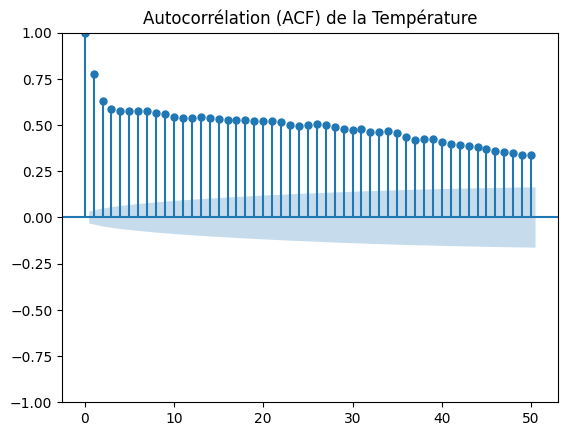

In [51]:
from statsmodels.graphics.tsaplots import plot_acf

# Tracer l'ACF de la série
plt.figure(figsize=(12, 6))
plot_acf(data2['Daily minimum temperatures'], lags=50)
plt.title('Autocorrélation (ACF) de la Température')
plt.show()


Le code utilise plot_acf() pour analyser l'autocorrélation de la température et identifier des cycles saisonniers. Un ACF élevé à intervalles réguliers indique une saisonnalité, tandis qu'une diminution rapide signifie une faible dépendance temporelle.

10. Identifier si la série est stationnaire en utilisant le test de Dickey-Fuller

In [52]:
from statsmodels.tsa.stattools import adfuller

# Appliquer le test de Dickey-Fuller
result = adfuller(data2['Daily minimum temperatures'].dropna())

# Résultats du test
print(f"Statistique de test : {result[0]}")
print(f"P-value : {result[1]}")
print(f"Valeurs critiques : {result[4]}")

# Interprétation
if result[1] < 0.05:
    print("La série est stationnaire (p-value < 0.05).")
else:
    print("La série n'est pas stationnaire (p-value >= 0.05).")


Statistique de test : -4.438768547217581
P-value : 0.0002532908223470075
Valeurs critiques : {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842}
La série est stationnaire (p-value < 0.05).


==> Le test de Dickey-Fuller vérifie si la série temporelle est stationnaire. Une p-value < 0.05 et une statistique de test inférieure aux valeurs critiques indiquent que la température est stationnaire, facilitant ainsi sa modélisation statistique.